# Machine Learning: Exercise 1 
**George Touros** 
*sid: 202220180423*

# Import & Prepare Data

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("day.csv")

In [3]:
df.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01/01/2011       1   0     1        0        6           0   
1        2  02/01/2011       1   0     1        0        0           0   
2        3  03/01/2011       1   0     1        0        1           1   
3        4  04/01/2011       1   0     1        0        2           1   
4        5  05/01/2011       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [4]:
df.tail()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
726      727  27/12/2012       1   1    12        0        4           1   
727      728  28/12/2012       1   1    12        0        5           1   
728      729  29/12/2012       1   1    12        0        6           0   
729      730  30/12/2012       1   1    12        0        0           0   
730      731  31/12/2012       1   1    12        0        1           1   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
726           2  0.254167  0.226642  0.652917   0.350133     247        1867   
727           2  0.253333  0.255046  0.590000   0.155471     644        2451   
728           2  0.253333  0.242400  0.752917   0.124383     159        1182   
729           1  0.255833  0.231700  0.483333   0.350754     364        1432   
730           2  0.215833  0.223487  0.577500   0.154846     439        2290   

      cnt  
726  2114  
727  3095  
728  1341  
729  1796  
730  2729

Let's replace the ordinal data with the actual values they represent. This way **we will get a better idea of the dataset.** 

In [5]:
seasons = {1:"springer", 2:"summer", 3:"fall", 4:"winter"}
weathers= {1:"Mostly Clear", 2:"Misty or Cloudy", 3:"Light Snow or Rain", 4:"Heavy Snow or Thunderstorm"}

df_pretty = df.replace({"season":seasons, "weather":weathers})
df_pretty.head()

instant      dteday    season  yr  mnth  holiday  weekday  workingday  \
0        1  01/01/2011  springer   0     1        0        6           0   
1        2  02/01/2011  springer   0     1        0        0           0   
2        3  03/01/2011  springer   0     1        0        1           1   
3        4  04/01/2011  springer   0     1        0        2           1   
4        5  05/01/2011  springer   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [6]:
df_pretty.describe()

instant          yr        mnth     holiday     weekday  workingday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    0.500684    6.519836    0.028728    2.997264    0.683995   
std    211.165812    0.500342    3.451913    0.167155    2.004787    0.465233   
min      1.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
25%    183.500000    0.000000    4.000000    0.000000    1.000000    0.000000   
50%    366.000000    1.000000    7.000000    0.000000    3.000000    1.000000   
75%    548.500000    1.000000   10.000000    0.000000    5.000000    1.000000   
max    731.000000    1.000000   12.000000    1.000000    6.000000    1.000000   

       weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.544894    0.183051    0.162961    0.142429    0.077498   
min      1.000000    0.059130    0.079070    0.000000    0.022392   
25%      1.000000    0.337083    0.337842    0.520000    0.134950   
50%      1.000000    0.498333    0.486733    0.626667    0.180975   
75%      2.000000    0.655417    0.608602    0.730209    0.233214   
max      3.000000    0.861667    0.840896    0.972500    0.507463   

            casual   registered          cnt  
count   731.000000   731.000000   731.000000  
mean    848.176471  3656.172367  4504.348837  
std     686.622488  1560.256377  1937.211452  
min       2.000000    20.000000    22.000000  
25%     315.500000  2497.000000  3152.000000  
50%     713.000000  3662.000000  4548.000000  
75%    1096.000000  4776.500000  5956.000000  
max    3410.000000  6946.000000  8714.000000

In [7]:
corr = df.corr(method='pearson')

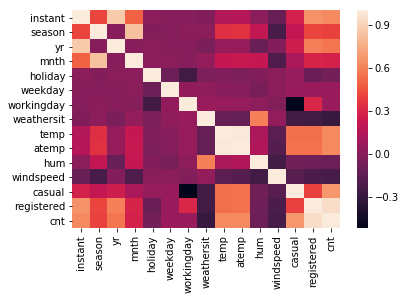

In [8]:
sns.heatmap(corr)

We can see that "atemp" and "temp" are very highly correlated. Therefore we will not use "atemp" in most of the analysis presented here. 

## Decision Tree ##
The first attempt at a decision tree will take into account all attributes and will reach the maximum depth of the tree.

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

In [10]:
#In this step we are quantising the cnt column, in order for it to serve as labels
df['cnt_bins'] = pd.cut(df['cnt'],10)

In [11]:
df['cnt_bins'] = df['cnt_bins'].astype('str')

In [12]:
df.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01/01/2011       1   0     1        0        6           0   
1        2  02/01/2011       1   0     1        0        0           0   
2        3  03/01/2011       1   0     1        0        1           1   
3        4  04/01/2011       1   0     1        0        2           1   
4        5  05/01/2011       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt         cnt_bins  
0   985  (891.2, 1760.4]  
1   801  (13.308, 891.2]  
2  1349  (891.2, 1760.4]  
3  1562  (891.2, 1760.4]  
4  1600  (891.2, 1760.4]

In [13]:
y = df['cnt_bins']

In [14]:
df.groupby(['cnt_bins']).size()

cnt_bins
(13.308, 891.2]      13
(1760.4, 2629.6]     71
(2629.6, 3498.8]     73
(3498.8, 4368.0]    122
(4368.0, 5237.2]    137
(5237.2, 6106.4]     81
(6106.4, 6975.6]     76
(6975.6, 7844.8]     79
(7844.8, 8714.0]     17
(891.2, 1760.4]      62
dtype: int64

As stated earlier I am choosing to ignore "atemp" as it is higly correlated with "temp", "hum" and "windspeed". I am also ignoring dates, day numbers etc. opting to choose the Boolean counterparts weekday, holiday as well as the season feature. I will also use the "weathersit" feature. Finally I will ignore casual and registered, as they are actually subsets of the value we seek to determine (the total counter).

In [15]:
x = df[['season','holiday','workingday','temp','hum','windspeed','weathersit']]

In [16]:
dtree = DecisionTreeClassifier(criterion = "entropy")
dtree.fit(x,y)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [17]:
dot_data = StringIO()
export_graphviz(dtree,out_file=dot_data,class_names=y,feature_names=x.columns
               ,filled = True, rounded = True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.617127 to fit



It is evident that the above tree is too big and complicated. It has learned everything about the data-set but is destined to fail as a predictor due to overfit. Let's now try to prune the tree by decreasing its maximum depth to 4. We will also create a test set in order to test our hypothesis that a smaller tree will be less prone to overfitting. 

In [18]:
from sklearn.model_selection import train_test_split


In [19]:
#Train set is 2/3 of the data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33, shuffle=True, random_state = 2018)

In [20]:
dtree2 = DecisionTreeClassifier(criterion = "entropy", max_depth=3)
dtree2.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

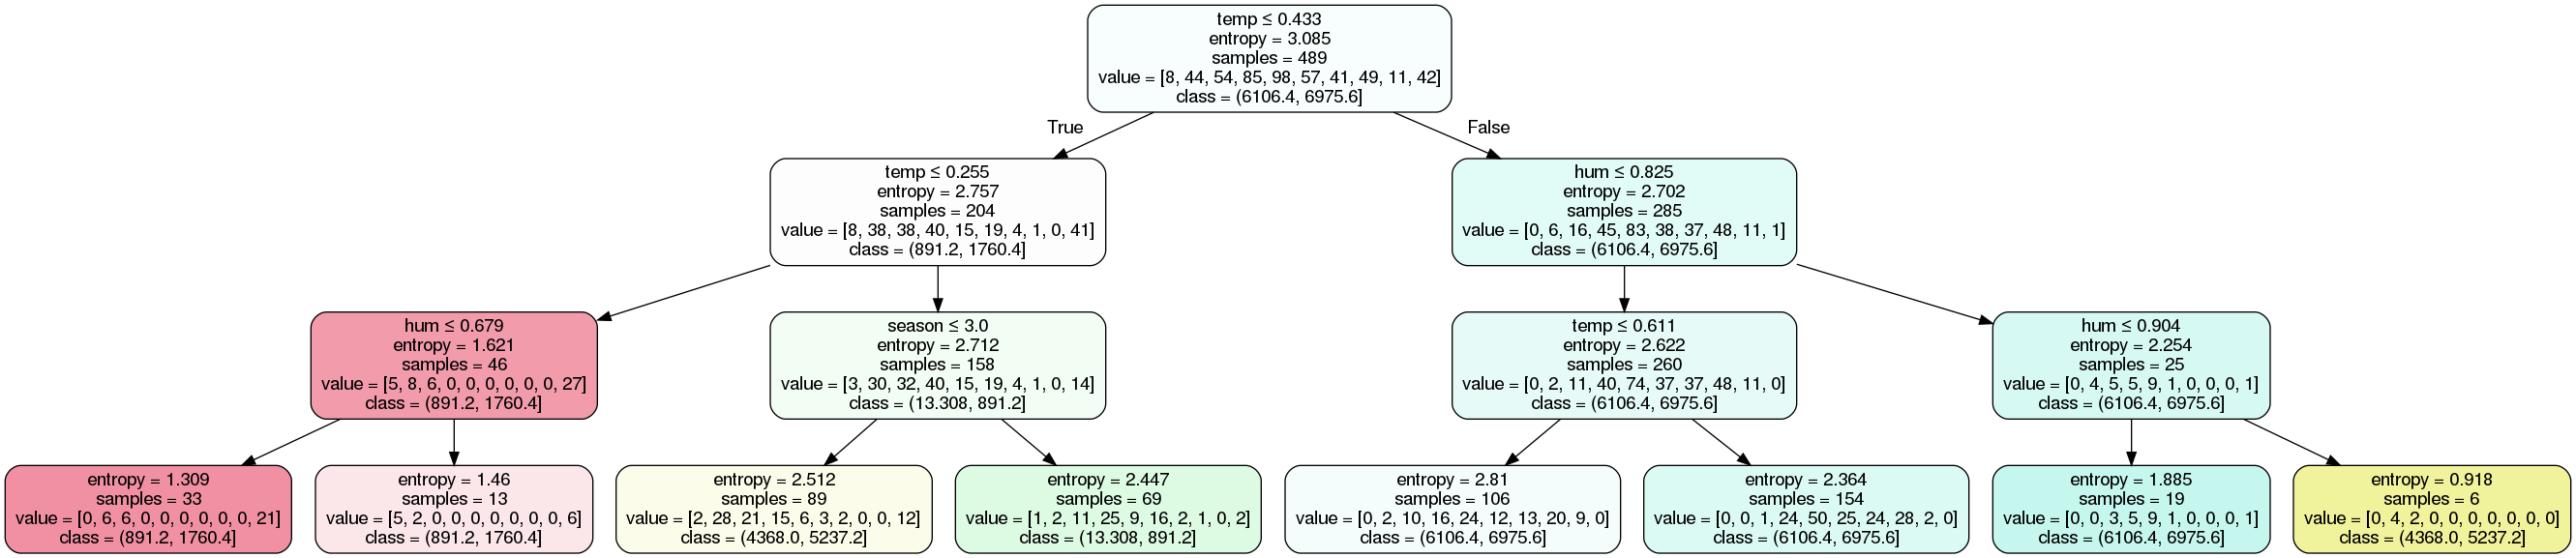

In [21]:
dot_data = StringIO()
export_graphviz(dtree2,out_file=dot_data,
                class_names=list(y_train),feature_names=x_train.columns
               ,filled = True, rounded = True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [22]:
dtree2.score(x_test,y_test)

0.2768595041322314

So the most prominent features are temp and hum, as they reduce the entropy, splitting the data in the first step with a 58%-42% analogy. The algorithm chose that as the best splitter.

# Linear Regression #

First, try the generic linear model from sklearn, to get an idea of how the model could look like: 

In [23]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [24]:
y = df["cnt"]

In [25]:
x = df[["temp","hum","windspeed"]]

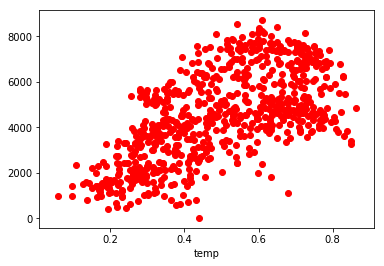

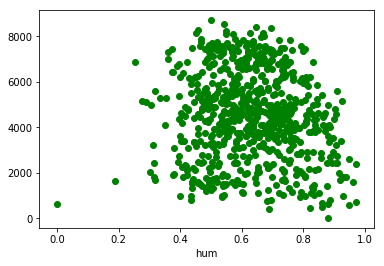

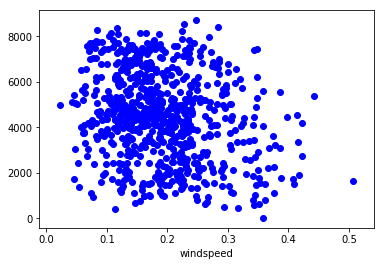

In [26]:
plt.scatter(x["temp"],y,color='red')
plt.xlabel("temp")
plt.show()
plt.scatter(x["hum"],y,color='green')
plt.xlabel("hum")
plt.show()
plt.scatter(x["windspeed"],y,color='blue')
plt.xlabel("windspeed")
plt.show()

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33,random_state=2018, shuffle=True)

In [28]:
regr = linear_model.LinearRegression()

In [29]:
regr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [30]:
y_pred = regr.predict(x_test)

In [31]:
print('Coefficients: \n',regr.coef_)
print('Intercept:',regr.intercept_)
print("Mean squared error: %.2f"
     % mean_squared_error(y_test,y_pred))
print('Variance score: %.2f' % r2_score(y_test,y_pred))

Coefficients: 
 [ 6379.12873973 -3437.94334335 -4317.26247319]
Intercept: 4289.747335915705
Mean squared error: 2165259.90
Variance score: 0.48


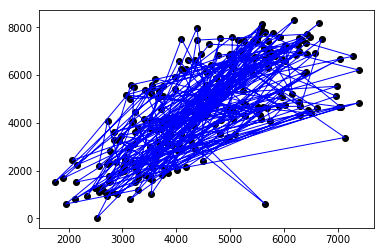

In [32]:
plt.scatter(y_pred,y_test, color = 'black')
plt.plot(y_pred,y_test,color='blue',linewidth=1)
plt.show()

Now let's try with SGDRegressor (which uses the Gradient Descent algorithm), that will allow us to tamper with the learning rate (a) and visualise our losses for each iteration of the model. 

In [33]:
from sklearn.linear_model import SGDRegressor
import sys
from io import StringIO
import numpy as np

We need to fetch the loss for each epoch, that will be sent to stdout by sklearn. We shall replace it with a new stream, storing it in a string, that we will process later to get what we need. 

## First Attempt ##
For the same train set, taking into account all features. We will start with a **learning rate of 1**. 

In [34]:
old_stdout = sys.stdout
sys.stdout = mystdout = StringIO()

-- Epoch 1
Norm: 8954.88, NNZs: 3, Bias: -565.389121, T: 489, Avg. loss: 9684892.766535
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 13617.58, NNZs: 3, Bias: 2868.941371, T: 978, Avg. loss: 6088948.354294
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 9174.85, NNZs: 3, Bias: 1385.108047, T: 1467, Avg. loss: 7982527.473644
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 9558.65, NNZs: 3, Bias: 4707.215365, T: 1956, Avg. loss: 10467051.119467
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 10825.43, NNZs: 3, Bias: 1674.044443, T: 2445, Avg. loss: 6981474.818769
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 8106.57, NNZs: 3, Bias: 761.412145, T: 2934, Avg. loss: 8039861.297052
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 13518.46, NNZs: 3, Bias: 1548.249040, T: 3423, Avg. loss: 6417128.480568
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 8608.15, NNZs: 3, Bias: 5682.040785, T: 3912, Avg. loss: 10357569.084358
Total training time: 0.00 seconds.
-- Epo

In [35]:
learning_rate = 1
sgd = SGDRegressor(loss="squared_loss", learning_rate='constant', 
                   eta0 = learning_rate, penalty = None,max_iter=50, average=False, random_state=2018,verbose=1)

In [36]:
sgd.fit(x_train,y_train)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', max_iter=50, n_iter=None, penalty=None,
       power_t=0.25, random_state=2018, shuffle=True, tol=None, verbose=1,
       warm_start=False)

In [37]:
sgd.coef_

array([ 4655.49684927, -1494.96294389, -5523.33856612])

In [38]:
y_pred = sgd.predict(x_test)

In [39]:
sys.stdout = old_stdout
loss_history = mystdout.getvalue()
print(loss_history)
loss_list=[]
for line in loss_history.split('\n'):
    if(len(line.split("loss: "))==1):
        continue
    loss_list.append(float(line.split("loss: ")[-1]))

In [40]:
print('Coefficients: \n',sgd.coef_)
print('Intercept:',sgd.intercept_)
print("Mean squared error: %.2f"
     % mean_squared_error(y_test,y_pred))
print('Variance score: %.2f' % r2_score(y_test,y_pred))

Coefficients: 
 [ 4655.49684927 -1494.96294389 -5523.33856612]
Intercept: [6350.7376507]
Mean squared error: 6684948.98
Variance score: -0.62


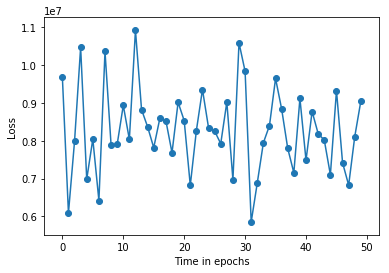

In [41]:
plt.figure()
plt.plot(np.arange(len(loss_list)),loss_list)
plt.scatter(np.arange(len(loss_list)),loss_list)
plt.xlabel("Time in epochs")
plt.ylabel("Loss")
plt.show()

The model has negative r^2 and the loss function doesn't seem to converge. The learning rate might be too large, given the fact that all the features are normalised, therefore smaller than 1. 

## Second Attempt ##
Let's decrease the learning rate

In [42]:
old_stdout = sys.stdout
sys.stdout = mystdout = StringIO()

In [43]:
learning_rate = 0.1
sgd = SGDRegressor(loss="squared_loss", learning_rate='constant', 
                   eta0 = learning_rate, penalty = None,max_iter=50, average=False, random_state=2018,verbose=1)

In [44]:
sgd.fit(x_train,y_train)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', max_iter=50, n_iter=None, penalty=None,
       power_t=0.25, random_state=2018, shuffle=True, tol=None, verbose=1,
       warm_start=False)

In [45]:
sgd.coef_

array([ 6644.07400879, -3268.16658807, -4388.59641919])

In [46]:
y_pred = sgd.predict(x_test)

In [47]:
sys.stdout = old_stdout
loss_history = mystdout.getvalue()
loss_list=[]
for line in loss_history.split('\n'):
    if(len(line.split("loss: "))==1):
        continue
    loss_list.append(float(line.split("loss: ")[-1]))

In [48]:
print('Coefficients: \n',sgd.coef_)
print('Intercept:',sgd.intercept_)
print("Mean squared error: %.2f"
     % mean_squared_error(y_test,y_pred))
print('Variance score: %.2f' % r2_score(y_test,y_pred))

Coefficients: 
 [ 6644.07400879 -3268.16658807 -4388.59641919]
Intercept: [4514.27629294]
Mean squared error: 2248087.00
Variance score: 0.46


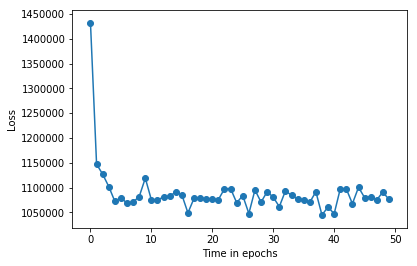

In [49]:
plt.figure()
plt.plot(np.arange(len(loss_list)),loss_list)
plt.scatter(np.arange(len(loss_list)),loss_list)
plt.xlabel("Time in epochs")
plt.ylabel("Loss")
plt.show()

The algorithm has a much better performance, as was expected. Neverheless we haven't managed a smooth convergence of the algorithm to 0 loss, nor have we managed to achieve an r^2 score better than that of the standard model.

## Third Attempt ##
Let's now decrease the learning rate further below 0.1. 

In [50]:
old_stdout = sys.stdout
sys.stdout = mystdout = StringIO()

In [51]:
learning_rate = 0.01
sgd = SGDRegressor(loss="squared_loss", learning_rate='constant', 
                   eta0 = learning_rate, penalty = None,max_iter=50, average=False, random_state=2018,verbose=1)

In [52]:
sgd.fit(x_train,y_train)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', max_iter=50, n_iter=None, penalty=None,
       power_t=0.25, random_state=2018, shuffle=True, tol=None, verbose=1,
       warm_start=False)

In [53]:
sgd.coef_

array([ 6514.24690641, -2933.17876653, -2711.87433128])

In [54]:
y_pred = sgd.predict(x_test)

In [55]:
sys.stdout = old_stdout
loss_history = mystdout.getvalue()
loss_list=[]
for line in loss_history.split('\n'):
    if(len(line.split("loss: "))==1):
        continue
    loss_list.append(float(line.split("loss: ")[-1]))

In [56]:
print('Coefficients: \n',sgd.coef_)
print('Intercept:',sgd.intercept_)
print("Mean squared error: %.2f"
     % mean_squared_error(y_test,y_pred))
print('Variance score: %.2f' % r2_score(y_test,y_pred))

Coefficients: 
 [ 6514.24690641 -2933.17876653 -2711.87433128]
Intercept: [3651.78952475]
Mean squared error: 2179636.65
Variance score: 0.47


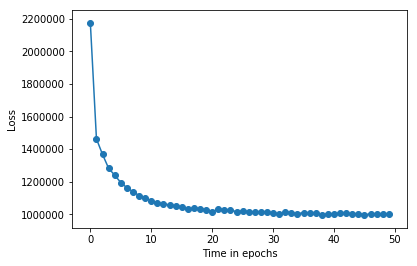

In [57]:
plt.figure()
plt.plot(np.arange(len(loss_list)),loss_list)
plt.scatter(np.arange(len(loss_list)),loss_list)
plt.xlabel("Time in epochs")
plt.ylabel("Loss")
plt.show()

It seems that the most suitable learning rate of the three was 0.01. This makes sense as the input variables are normalised, and therefore are smaller than 1. The learning rate is tangent to the curve of the cost function, and whose scale is determined by the scale of the inputs, so a learning rate of 0.01 is more appropriate to allow the algorithm to converge.

The r^2 is very close to that of the standard algorithm, which let's us know that we are on the right direction. We could further try out increasing the epochs, or even adopting an adaptive learning rate, that will optimise the convergence of the gradient descent algorithm

## Plotting the loss ##

Let's demonstrate this by using a single instance from the training set, and let's choose the most prominent feature which is atemp. We will plot the loss with respect to (y-y_pred)

In [58]:
sys.stdout = old_stdout
n = 1 #the number of instances of the loss function we want to keep
xi = x_train["temp"][:n].values.reshape(-1,1)
yi = y_train[:n].values
print(xi)

[[0.5325]]


In [59]:
old_stdout = sys.stdout
sys.stdout = mystdout = StringIO()

-- Epoch 1
Norm: 25.28, NNZs: 1, Bias: 47.480000, T: 1, Avg. loss: 11271752.000000
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 50.24, NNZs: 1, Bias: 94.350567, T: 1, Avg. loss: 10984250.485345
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 74.88, NNZs: 1, Bias: 140.619525, T: 1, Avg. loss: 10704082.091657
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 99.20, NNZs: 1, Bias: 186.294594, T: 1, Avg. loss: 10431059.777616
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 123.21, NNZs: 1, Bias: 231.383398, T: 1, Avg. loss: 10165001.272645
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 146.91, NNZs: 1, Bias: 275.893462, T: 1, Avg. loss: 9905728.955231
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 170.31, NNZs: 1, Bias: 319.832214, T: 1, Avg. loss: 9653069.734340
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 193.41, NNZs: 1, Bias: 363.206988, T: 1, Avg. loss: 9406854.933865
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 216.21, NNZs: 1, Bias: 406.02502

We are choosing *max_iter = 1* in order to simulate a single iteration of the algorithm.

In [60]:
learning_rate = 0.01
sgd = SGDRegressor(loss="squared_loss", learning_rate='constant', 
                   eta0 = learning_rate, penalty = None,max_iter=1, average=False, random_state=2018,verbose=1)

In [61]:
p_sum = []
epochs = 100

for epoch in range(epochs):
    model = sgd.partial_fit(xi,yi)
    y=model.predict(xi)
    p_sum.append(np.sum(yi-y))

In [62]:
sys.stdout = old_stdout
loss_history = mystdout.getvalue()
print(loss_history)
loss_list=[]
for line in loss_history.split('\n'):
    if(len(line.split("loss: "))==1):
        continue
    loss_list.append(float(line.split("loss: ")[-1]))

In [63]:
print(model.coef_)

[1428.55983623]


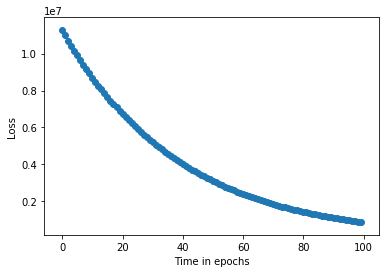

In [64]:
plt.figure()
plt.plot(np.arange(len(loss_list)),loss_list)
plt.scatter(np.arange(len(loss_list)),loss_list)
plt.xlabel("Time in epochs")
plt.ylabel("Loss")
plt.show()

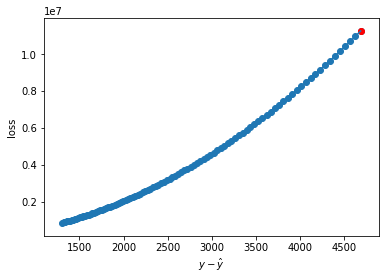

In [65]:
plt.figure()
plt.plot(p_sum,loss_list)
plt.scatter(p_sum,loss_list)
plt.scatter(p_sum[:1], loss_list[:1], color='red')
plt.xlabel("$y-\hat{y}$")
plt.ylabel("loss")
plt.show()

# Logistic Regression

First we need to split the data into 2 categories: {0:"few" 1:"many"}

In [66]:
df['cnt_bins'] = pd.cut(df['cnt'],2,labels=["0","1"])

In [67]:
df.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01/01/2011       1   0     1        0        6           0   
1        2  02/01/2011       1   0     1        0        0           0   
2        3  03/01/2011       1   0     1        0        1           1   
3        4  04/01/2011       1   0     1        0        2           1   
4        5  05/01/2011       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt cnt_bins  
0   985        0  
1   801        0  
2  1349        0  
3  1562        0  
4  1600        0

In [68]:
#Re-instantiate the train and test datasets
y = df['cnt_bins']
x = df[["temp","hum","windspeed"]]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33,random_state=2018, shuffle=True)

In [69]:
np.shape(x_train)

(489, 3)

Initially we will once again use the SciKit standard class for Logistic Regression, for benchmarking. 

In [70]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state = 2018)
logreg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=2018, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [71]:
y_pred = logreg.predict(x_test) #The predicted values of y in the test set

In [72]:
logreg.score(x_test,y_test) #accuracy on the test data is great!

0.8140495867768595

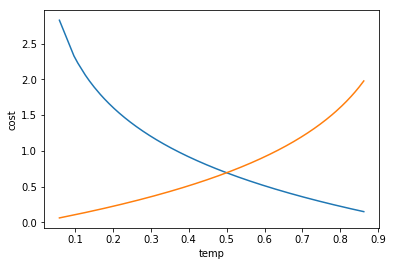

/opt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.


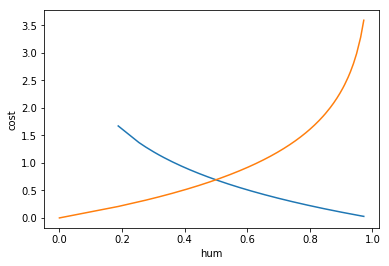

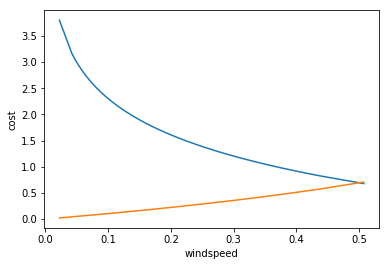

In [73]:
#Here's the plotting of the cost function for each of the variables

x_prom = x["temp"].sort_values()
plt.plot(x_prom,-np.log(x_prom)) #cost if label is correct
plt.plot(x_prom,-np.log(1-x_prom)) #cost if label is incorrect
plt.xlabel("temp")
plt.ylabel("cost")
plt.show()
x_prom = x["hum"].sort_values()
plt.plot(x_prom,-np.log(x_prom)) #cost if label is correct
plt.plot(x_prom,-np.log(1-x_prom)) #cost if label is incorrect
plt.xlabel("hum")
plt.ylabel("cost")
plt.show()
x_prom = x["windspeed"].sort_values()
plt.plot(x_prom,-np.log(x_prom)) #cost if label is correct
plt.plot(x_prom,-np.log(1-x_prom)) #cost if label is incorrect
plt.xlabel("windspeed")
plt.ylabel("cost")
plt.show()

In order to plot the loss in terms of y-y_hat we will do the same trick as in part 2, this time using the SGDClassifier

In [74]:
from sklearn.linear_model import SGDClassifier

In [75]:
n = 1 # number of instances to keep
xi= x_train[["temp"]][:n].values
yi= y_train[:n].values

In [76]:
old_stdout = sys.stdout
sys.stdout = mystdout = StringIO()

In [77]:
learning_rate = 2
logreg2 = SGDClassifier(loss="log", learning_rate='constant', eta0=learning_rate, penalty=None, max_iter=1,
                     average=False, random_state=2018, verbose=1)

In [78]:
p_sum  = [] # this holds the sum of y-y_hat, for all instances 
epochs = 15

for epoch in range(epochs):
    model  = logreg2.partial_fit(xi, yi, classes=["0","1"])
    y  = model.predict(xi)
    p  = model.decision_function(xi)
    c = (1 - np.mean(y == yi))
    p_sum.append(p)


In [79]:
sys.stdout = old_stdout
loss_history = mystdout.getvalue()
#print(loss_history)
loss_list  = []
for line in loss_history.split('\n'):
    if(len(line.split("loss: ")) == 1):
        continue
    else:
        loss_list.append(float(line.split("loss: ")[-1]))

In [80]:
print(loss_history)

-- Epoch 1
Norm: 0.53, NNZs: 1, Bias: 1.000000, T: 1, Avg. loss: 0.693147
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 0.76, NNZs: 1, Bias: 1.433891, T: 1, Avg. loss: 0.244553
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 0.91, NNZs: 1, Bias: 1.707880, T: 1, Avg. loss: 0.147334
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 1.02, NNZs: 1, Bias: 1.908794, T: 1, Avg. loss: 0.105868
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 1.10, NNZs: 1, Bias: 2.067664, T: 1, Avg. loss: 0.082768
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 1.17, NNZs: 1, Bias: 2.199155, T: 1, Avg. loss: 0.068006
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 1.23, NNZs: 1, Bias: 2.311370, T: 1, Avg. loss: 0.057743
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 1.28, NNZs: 1, Bias: 2.409269, T: 1, Avg. loss: 0.050188
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 1.33, NNZs: 1, Bias: 2.496110, T: 1, Avg. loss: 0.044391
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 1.

In [81]:
print(loss_list)

[0.693147, 0.244553, 0.147334, 0.105868, 0.082768, 0.068006, 0.057743, 0.050188, 0.044391, 0.039801, 0.036075, 0.03299, 0.030392, 0.028176, 0.026261]


In [82]:
print(p_sum)

[array([1.28355625]), array([1.8404797]), array([2.19216017]), array([2.45004388]), array([2.65396333]), array([2.82273853]), array([2.96677338]), array([3.0924328]), array([3.20389805]), array([3.30406497]), array([3.3950229]), array([3.47832923]), array([3.55517615]), array([3.62649675]), array([3.69303513])]


In [83]:
print(model.coef_)

[[1.53210364]]


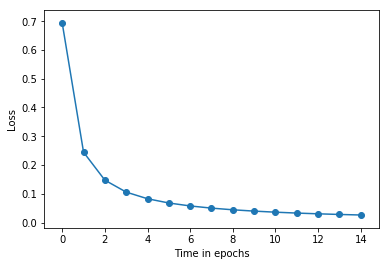

In [84]:
plt.figure()
plt.plot(np.arange(len(loss_list)), loss_list)
plt.scatter(np.arange(len(loss_list)), loss_list)
plt.xlabel("Time in epochs")
plt.ylabel("Loss")
plt.show()

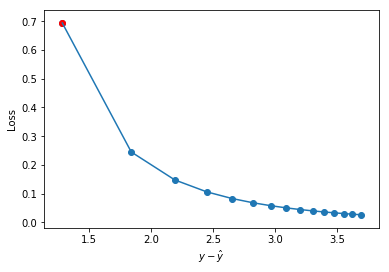

In [85]:
plt.figure()
plt.plot(p_sum, loss_list)
plt.scatter(p_sum, loss_list)
plt.scatter(p_sum[:1], loss_list[:1], color='red')
plt.xlabel("$y-\hat{y}$")
plt.ylabel("Loss")
plt.show()

We notice that this time while the loss decreases over the epochs, the distance between y and $\hat{y}$ seems to increase. 